# Data & Apprentissage, M2CHPS

## Assignments - Part 1

**Lecturer:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).   
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse-2024.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse-2023.html)

The most updated version of this file can be found at the webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Assignments1.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Assignments1.ipynb).

## 0. Before you start

* Work on the assignment either alone or in a team of two (pair). Students that will work alone will benefit from a 15% bonus. Important: The point in working in a pair is not to split the work, but to collaborate! 
* Prepare **a single jupiter notebook** in a report-like format for all the exercises. Use this notebook as a starting point and place your answers just below each exercise. Describe properly what you do in each step of your solution, followed by your well-commented code implementation that can automatically produce figures and numerical results. Results should also be well-commented and discussed. Your comments can be either in English or in French.
* If you need to provide mathematical expressions, incorporate all that in your notebook in a latex form (not handwritten!). 
* Important: send your notebook that includes all your work and any additional files you used (e.g. datasets) at by email, with a title ``M2CHPS <year> - <Surname1> & <Surname2>``. The title of the notebook should have the surnames of the students. The body of the email should also mention the students' names and how the work was split among them; if you face difficulties in precising this with your classmate, please write individual emails. 
* Always use references for things you reuse (e.g. internet, forums, books, published papers, etc.)
* Do not copy-paste from the internet recipies that do the asked thing (or what is most usually observed: to use something relevant but not exactly what is asked). You need to understand what you use (sources should be properly referenced), adapt it to what each exercise asks for, and comment clearly the results. Poorly commented and explained pieces of work/code will not be taken seriously into account. 
* Copying from one another is not acceptable. We are strict with that: cheating in even one exercise will incur **a zero to all projects** (not just one assignement) and possible disqualification from the exams. Your work will be cross-checked against anything similar submitted from past students of the course.
* The assignments will be examined orally at the end of the semester. Each group of students should be able to explain in about 10 mins all what they did, and answer short questions.
* **Deadline: midnight of Monday 20/10**. 

## Exercise 1 - [30%]
Read about the iterative [RANdom SAmple Consensus (RANSAC)](https://en.wikipedia.org/wiki/Random_sample_consensus) method for robust linear regression. Consult also the material of the Lab and the documentation of scikit learn.

**a)** Implement from scratch your own code for the RANSAC algorithm. You can still use as a building block the native linear regression of scikit learn in your implementation. Then, compare it with the simple linear regression and the build-in RANSAC implementation of scikit learn.

a1) Apply your solution to the dataset of the example given in [Lab 2](http://kalogeratos.com/MyCourses/DML-M2HPC/Lab2.ipynb) to see that it  matches the behavior of the already coded method of scikit learn. Create plots including the linear models found by the typical linear regressor, the scikit RANSAC, and you version(s).

a2) Apply your method to the following cases:
* Use only the part of the inliners that comes from the inclined linear model (about 1000 points). Add extra $p$% of noisy points (where $p$ can be 5%, 10%, 20%, 30%) by picking random elements of the data and perturbing them "sufficiently" with a Gaussian noise so that they get dislocated far from the rest of the data on both sides.
* Do as before, but constrain the perturbation to be only positive (all noisy points will be above the inline data).
* Do as before, but the perturbed data will not be randomly selected, but rather correspond to the $p$% of the points with lower $y$ coordinate (the points at the lower left part of the plot).

What differences do you observe among these cases. Report with illustrative results and comments. You can test additional cases using the same data generation code, after changing some of the parameters (e.g. the number of outliers and their distance to the inliers).

**b)** The original RANSAC uses inlying data points as votes for candidate models. An alternative is to use the opposite approach: i.e. to use the models to vote for the most inlying points. Implement this variation that operates as follows:
- Each time you subsample from the data, build a linear model, all inliers get a vote +1.
- After having built the predefined number of models, use the top q% (e.g. 75%) voted points and build the final linear model using only those points.

Use the previous dataset or/and other variations you may generate to demonstrate differences in performance, and discuss the results.

**c)** As discussed in the class, the logic behind the RANSAC could actually be seen as a more general tool than just performing regression. More specifically, it can be seen as a way to perfom various kinds of *robust estimation*. 

<img src="./cloud-of-points-outliers.png" alt="Drawing" style="width: 500px;"/>

c1) Assume for example the problem where we have a point-cloud of data and we want to estimate their "center", as a group representative, but in a robust way. The figure above illustrates an example where the input data contains $100$ inliers and $10$ outliers, which however you don't know a priori. Here, the inliers come from a Gaussian distribution with $\mu = (0,0)$ and $\sigma = 0.83$, while the ouliers come from a Gaussian dislocated at $\mu = (0,0)$ and $\sigma = 1.5$. You can get the [.mat data file](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/cloud-of-points-data.mat) with this example and/or write your own code to generate it. 

How would you design a solution to this problem that adopts the RANSAC principle so that for this kind of data input we can compute a representative as close as possible to the mean of the inliers?

c2) Extend this approach to the clustering of the data in a given number of $k$ clusters by considering a centroid-based clustering method (e.g. $k$-means) as the  internal model learner. Provide an implementation and demonstrate some example(s).

c3) Write an abstract pseudocode that expresses the generalization of RANSAC in arbitrary statistical estimation or learning problems? 

https://www.youtube.com/watch?v=BHNNz6jCuHw One of the main source used for the following implementation

In [ ]:
# Question a & a1)
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import datasets, linear_model

# re Using the dataset generated in the lab
# generate the dataset with a linear relationship and some noise
N_samples = 1000
N_outliers = 50
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)

# flatten the datapoints in a list like : points= ([x1,y1],[x2,y2],....,[xn,yn])
# to simplify choosing 2 random points
points = list(zip(X.flatten(), y))

# RANSAC parameters
niter = 100
tolerance = 10 
maximum_inlierscount = 0
coefficients = []

# RANSAC algorithm
for i in range(niter):

    # choosing two random points
    datapoint1 = random.randrange(0,len(points)-1)
    datapoint2 = random.randrange(0,len(points)-1)
    while datapoint1 == datapoint2:
        datapoint2 = random.randrange(0,len(points)-1)
        
    # calculate line coefficients (Ax + By + C = 0)
    A = points[datapoint1][1] - points[datapoint2][1]
    B = points[datapoint2][0] - points[datapoint1][0]
    C = points[datapoint1][0] * points[datapoint2][1] - points[datapoint1][1] * points[datapoint2][0]
    
    # count inliers for this line
    inlierscount = 0
    for i in range(len(points)):
        distance = abs(A * points[i][0] + B * points[i][1] + C) / (np.sqrt(A * A + B * B))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount


# fitting the best-fit line found by the home made RANSAC
A, B, C = coefficients
allxvalues = [point[0] for point in points]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C - A * xvalues[0]) / B, (-C - A * xvalues[1]) / B]

# fitting the best-fit line found by sklearn's RANSAC
reg_ransac = linear_model.RANSACRegressor()
reg_ransac.fit(X,y)
inlier_mask = reg_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# fitting with Linear Regressor
lr = linear_model.LinearRegression()
lr.fit(X,y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = reg_ransac.predict(line_X)

# plotting besf fit line of Ransac, homemade ransac & linear regressor
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.plot(xvalues, yvalues, color="red", label="Home Made Ransac (RANSAC)")

plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("RANSAC on Generated Dataset with Outliers")
plt.legend()
plt.savefig('plots/questionA1.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
#Question a2-1)

import numpy as np
import matplotlib.pyplot as plt
import random
import argparse
from sklearn import datasets, linear_model

parser = argparse.ArgumentParser()
parser.add_argument('--perturbation', type=float, required=True, help='Purcentage of the samples to perturb 5%=0.05')
args = parser.parse_args()

# re Using the dataset generated in the lab
# generate the dataset with a linear relationship and some noise
N_samples = 1000
N_outliers = 50
X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

# perturbation of p% of the samples, the scale of the perturbation is controled with std_dev
p = args.perturbation
p_samples = int(p * N_samples)
p_selected = np.random.choice(N_samples, p_samples, replace=False)
std_dev = 80
noise = np.random.normal(0, std_dev,size=p_samples)
y[p_selected] += noise

# flatten the datapoints in a list like : points= ([x1,y1],[x2,y2],....,[xn,yn])
# to simplify choosing 2 random points

points = list(zip(X.flatten(), y))

# RANSAC parameters
niter = 100
tolerance = 10  # Adjusted for the scale of the dataset
maximum_inlierscount = 0
coefficients = []

# RANSAC algorithm
for i in range(niter):

    datapoint1 = random.randrange(0,len(points)-1)
    datapoint2 = random.randrange(0,len(points)-1)
    while datapoint1 == datapoint2:
        datapoint2 = random.randrange(0,len(points)-1)
        
    # Calculate line coefficients (Ax + By + C = 0)
    A = points[datapoint1][1] - points[datapoint2][1]
    B = points[datapoint2][0] - points[datapoint1][0]
    C = points[datapoint1][0] * points[datapoint2][1] - points[datapoint1][1] * points[datapoint2][0]
    
    # Count inliers for this line
    inlierscount = 0
    for i in range(len(points)):
        distance = abs(A * points[i][0] + B * points[i][1] + C) / (np.sqrt(A * A + B * B))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount



# fitting the best-fit line found by the home made RANSAC
A, B, C = coefficients
allxvalues = [point[0] for point in points]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C - A * xvalues[0]) / B, (-C - A * xvalues[1]) / B]

# fitting the best-fit line found by sklearn's RANDSAC
reg_ransac = linear_model.RANSACRegressor()
reg_ransac.fit(X,y)
inlier_mask = reg_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# fitting with Linear Regressor
lr = linear_model.LinearRegression()
lr.fit(X,y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = reg_ransac.predict(line_X)

#plotting best fit line of ransac, homemade ransac & linear regressot
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.scatter(X[p_selected], y[p_selected], color='red',marker='.', label='Perturbed Samples')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.plot(xvalues, yvalues, color="red", label="Home Made Ransac")

plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title(f"Custom Ransac vs Regular on {p * 100:.2f}% perturbed dataset")
plt.legend()
plt.savefig(f'plots/questionA2_{p * 100:.2f}percent.png', dpi=300, bbox_inches='tight')
plt.show()


usage: ipykernel_launcher.py [-h] --perturbation PERTURBATION
ipykernel_launcher.py: error: the following arguments are required: --perturbation


SystemExit: 2

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Positive Perturbations 

import numpy as np
import matplotlib.pyplot as plt
import random
import argparse
from sklearn import datasets, linear_model

# parsing the %p of perturbation
parser = argparse.ArgumentParser()
parser.add_argument('--perturbation', type=float, required=True, help='Purcentage of the samples to perturb 5%=0.05')
args = parser.parse_args()

# re Using the dataset generated in the lab
# generate the dataset with a linear relationship and some noise
N_samples = 1000
N_outliers = 50

X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

# perturbation of p% of the samples, the scale of the perturbation is controled with std_dev
p = args.perturbation
p_samples = int(p * N_samples)
p_selected = np.random.choice(N_samples, p_samples, replace=False)
std_dev = 80
noise = np.abs(np.random.normal(0, std_dev,size=p_samples))
y[p_selected] += noise

#np.random.seed(0)
#X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
#y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)

# flatten the datapoints in a list like : points= ([x1,y1],[x2,y2],....,[xn,yn])
# to simplify choosing 2 random points

points = list(zip(X.flatten(), y))

# RANSAC parameters
niter = 100
tolerance = 10 
maximum_inlierscount = 0
coefficients = []

# RANSAC algorithm
for i in range(niter):

    datapoint1 = random.randrange(0,len(points)-1)
    datapoint2 = random.randrange(0,len(points)-1)
    while datapoint1 == datapoint2:
        datapoint2 = random.randrange(0,len(points)-1)
        
    # calculate line coefficients (Ax + By + C = 0)
    A = points[datapoint1][1] - points[datapoint2][1]
    B = points[datapoint2][0] - points[datapoint1][0]
    C = points[datapoint1][0] * points[datapoint2][1] - points[datapoint1][1] * points[datapoint2][0]
    
    # count inliers for this line
    inlierscount = 0
    for i in range(len(points)):
        distance = abs(A * points[i][0] + B * points[i][1] + C) / (np.sqrt(A * A + B * B))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount

# fitting best-fit line found by the home made RANSAC
A, B, C = coefficients
allxvalues = [point[0] for point in points]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C - A * xvalues[0]) / B, (-C - A * xvalues[1]) / B]

# fitting the best-fit line found by sklearn's RANDSAC
reg_ransac = linear_model.RANSACRegressor()
reg_ransac.fit(X,y)
inlier_mask = reg_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# fitting with Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X,y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = reg_ransac.predict(line_X)


#plotting best fit line of ransac, homemade ransac & linear regressot
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.scatter(X[p_selected], y[p_selected], color='red',marker='.', label='Perturbed Samples')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.plot(xvalues, yvalues, color="red", label="Home Made Ransac")

plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title(f"Custom Ransac vs Regular on {p * 100:.2f}% perturbed dataset")
plt.legend()
plt.savefig(f'plots/questionA2_positive_perturbations{p * 100:.2f}percent.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Sorted perturbation 

import numpy as np
import matplotlib.pyplot as plt
import random
import argparse
from sklearn import datasets, linear_model

parser = argparse.ArgumentParser()
parser.add_argument('--perturbation', type=float, required=True, help='Purcentage of the samples to perturb 5%=0.05')
args = parser.parse_args()

# re Using the dataset generated in the lab
# generate the dataset with a linear relationship and some noise
N_samples = 1000
N_outliers = 50

X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)


# perturbation of p% of the samples, the scale of the perturbation is controled with std_dev
p = args.perturbation
p_samples = int(p * N_samples)
temp = np.argsort(y)
p_selected = temp[:p_samples]
std_dev = 80
noise = np.random.normal(0, std_dev,size=p_samples)
y[p_selected] += noise

#np.random.seed(0)
#X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
#y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)

# flatten the datapoints in a list like : points= ([x1,y1],[x2,y2],....,[xn,yn])
# to simplify choosing 2 random points

points = list(zip(X.flatten(), y))

# RANSAC parameters
niter = 100
tolerance = 10  # Adjusted for the scale of the dataset
maximum_inlierscount = 0
coefficients = []

# RANSAC algorithm
for i in range(niter):

    datapoint1 = random.randrange(0,len(points)-1)
    datapoint2 = random.randrange(0,len(points)-1)
    while datapoint1 == datapoint2:
        datapoint2 = random.randrange(0,len(points)-1)
        
    # calculate line coefficients (Ax + By + C = 0)
    A = points[datapoint1][1] - points[datapoint2][1]
    B = points[datapoint2][0] - points[datapoint1][0]
    C = points[datapoint1][0] * points[datapoint2][1] - points[datapoint1][1] * points[datapoint2][0]
    
    # count inliers for this line
    inlierscount = 0
    for i in range(len(points)):
        distance = abs(A * points[i][0] + B * points[i][1] + C) / (np.sqrt(A * A + B * B))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount


# fitting the best-fit line found by the home made RANSAC
A, B, C = coefficients
allxvalues = [point[0] for point in points]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C - A * xvalues[0]) / B, (-C - A * xvalues[1]) / B]

# fitting the best-fit line found by sklearn's RANDSAC
reg_ransac = linear_model.RANSACRegressor()
reg_ransac.fit(X,y)
inlier_mask = reg_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# fitting with Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X,y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = reg_ransac.predict(line_X)

#plotting best fit line of ransac, homemade ransac & linear regressot
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.scatter(X[p_selected], y[p_selected], color='red',marker='.', label='Perturbed Samples')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
plt.plot(xvalues, yvalues, color="red", label="Home Made Ransac")

plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title(f"Custom Ransac vs Regular on {p * 100:.2f}% perturbed dataset")
plt.legend()
plt.savefig(f'plots/questionA2_sorted_{p * 100:.2f}percent.png', dpi=300, bbox_inches='tight')
plt.show()


Discussing the results :


<img src="./plots/questionA2_5.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_10.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_20.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_30.00percent.png" alt="Drawing" style="width: 350px;"/>


At 5% perturbations, the linear regressor and the sklearn's Ransac still manages to fit as close to the inliners for the linear regressor it's due to the homogenous spread of the red dots, our custom version's fit is slightly worse than the other two showing that it might be worse at ignoring the outliers than sklearn's version.

At 10% perturbations, the observations are pretty much the same, with our custom version performing slightly worse.

For 20% and 30% here again, same observation , our custom version performs worse as perturbation level increases.

<img src="./plots/questionA2_positive_perturbations5.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_positive_perturbations10.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_positive_perturbations20.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_positive_perturbations30.00percent.png" alt="Drawing" style="width: 350px;"/>

With positive perturbations only 

At 5% we observe that our custom Ransac heavily tilts clockwise, however this can be attributed to the non-deterministic aspect of the Ransac algorithm i.e the inability to output the same results twice foor the same input, this is supported by the fact that the next plots showing increased level of perturbations seems to be show that the custom ransac still manages to fit well to the data even with positive perturbations, the linear regressor shifts up as we increase the percentage of perturbations showing again that homogeneous perturbations directed in one direction only will tend to shift the Linear regressor towards that direction, for sklearn's Ransac, no particular observations, it still manages to capture the outliers and ignores them to fit accordingly.

<img src="./plots/questionA2_sorted_5.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_sorted_10.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_sorted_20.00percent.png" alt="Drawing" style="width: 350px;"/> <img src="./plots/questionA2_sorted_30.00percent.png" alt="Drawing" style="width: 350px;"/>

Altering the %p with lower coordinates doesnt seem to affect the Linear regressor or both version of Ransac, it might suggest that in this particular region or for this particular dataset it might be resilient to noise and the majority of the clean data can still inform the model pretty well.



In [ ]:
# Question b
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import datasets, linear_model
from collections import defaultdict

# Re Using the dataset generated in the lab
# Generate the dataset with a linear relationship and some noise
N_samples = 1000
N_outliers = 50

X, y, coef = datasets.make_regression(n_samples=N_samples, n_features=1, n_informative=1, noise=10, coef=True, random_state=0)

np.random.seed(0)
X[:N_outliers] = 3 + 0.5 * np.random.normal(size=(N_outliers, 1))
y[:N_outliers] = -3 + 10 * np.random.normal(size=N_outliers)



# flatten the datapoints in a list like : points= ([x1,y1],[x2,y2],....,[xn,yn])
# to simplify choosing 2 random points

points = list(zip(X.flatten(), y))

# RANSAC parameters
niter = 100
tolerance = 10  # Adjusted for the scale of the dataset
maximum_inlierscount = 0
coefficients = []
votes = defaultdict(int)
q = 0.75

# RANSAC algorithm
for i in range(niter):
    datapoint1 = random.randrange(0,len(points)-1)
    datapoint2 = random.randrange(0,len(points)-1)
    while datapoint1 == datapoint2:
        datapoint2 = random.randrange(0,len(points)-1)
        
    # calculate line coefficients (Ax + By + C = 0)
    A = points[datapoint1][1] - points[datapoint2][1]
    B = points[datapoint2][0] - points[datapoint1][0]
    C = points[datapoint1][0] * points[datapoint2][1] - points[datapoint1][1] * points[datapoint2][0]
    
    # count inliers for this line
    inlierscount = 0
    for i in range(len(points)):
        distance = abs(A * points[i][0] + B * points[i][1] + C) / (np.sqrt(A * A + B * B))
        if distance < tolerance:
            votes[i] += 1  


# select the top q% voted points
num_top_points = int(len(points) * q)
top_voted_points = sorted(votes, key=votes.get, reverse=True)[:num_top_points]
final_inliers = [points[i] for i in top_voted_points]


# fit the final linear model according to the top %q 
x_coords, y_coords = zip(*final_inliers)
A_final, B_final = np.polyfit(x_coords, y_coords, 1)


# Calculate coefficients for the final line using least squares (Ax + By + C = 0 form)
x_coords, y_coords = zip(*final_inliers)
A_final, B_final = np.polyfit(x_coords, y_coords, 1)  # Fit line y = A*x + B
C_final = 0  # Not used in np.polyfit; we assume Ax + By + C = 0 form

# Plot the best-fit line found by the modified RANSAC
allxvalues = [point[0] for point in points]
xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [A_final * xvalues[0] + B_final, A_final * xvalues[1] + B_final]
plt.plot(xvalues, yvalues, color="red", label="Home Made Ransac (RANSAC)")


# Plot the best-fit line found by sklearn's RANDSAC
reg_ransac = linear_model.RANSACRegressor()
reg_ransac.fit(X,y)
inlier_mask = reg_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


# Plot with Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X,y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = reg_ransac.predict(line_X)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')

plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.title("Vote based RANSAC on Generated Dataset with Outliers")
plt.legend()
plt.savefig('plots/questionA1.png', dpi=300, bbox_inches='tight')
plt.show()





Comparative result between custom ransac from question 1 and the vote_based ransac : 

<img src="./plots/questionA1.png" alt="Drawing" style="width: 500px;"/> <img src="./plots/vote_based_ransac.png" alt="Drawing" style="width: 500px;"/>


## Exercise 2 - [15%]

In Section 2.5 of the book "[The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf)", by T. Hastie, R. Tibshirani, and J. Friedman, there is a mention about the effects of the *curse of dimensionality*. Read the section and implement the code to reproduce and verify all the experiments shown in the Figures 2.6, 2.7, 2.8, and 2.9.
	

So for the first experiments, let's suppose we want to capture the neighborhood of sample representing a fraction $s$ of the volume let's say s=0.1 or 10%
In a p dimension space, to get this sub-volume of neighborhood we need arcs (of the hypercube) of length $s^{\frac{1}{p}}$

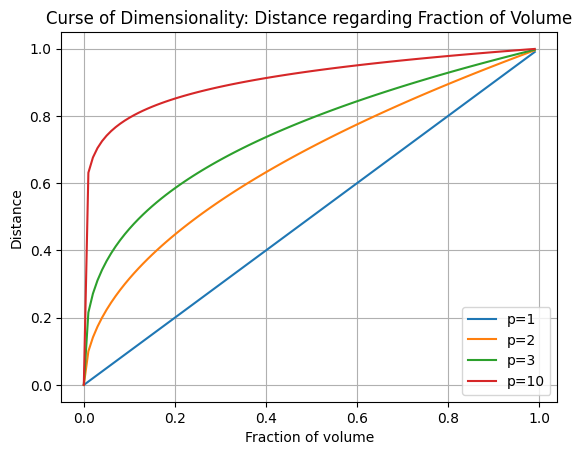

In [3]:
# Figure 2.6
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(r,p):
    return r ** (1/p)


dimensions= [1,2,3,10]
test_range = np.arange(0,1,0.01)
results = {dim: [] for dim in dimensions}


for i in test_range:
    for d in dimensions:
        temp = calculate_distance(i,d)
        results[d].append(temp)


for i, dim in enumerate(dimensions):
    plt.plot(test_range, results[dim],marker='', label=f'p={dim}')


plt.xlabel("Fraction of volume")
plt.ylabel("Distance")
plt.title("Curse of Dimensionality: Distance regarding Fraction of Volume")
plt.grid()
plt.legend()
plt.show()


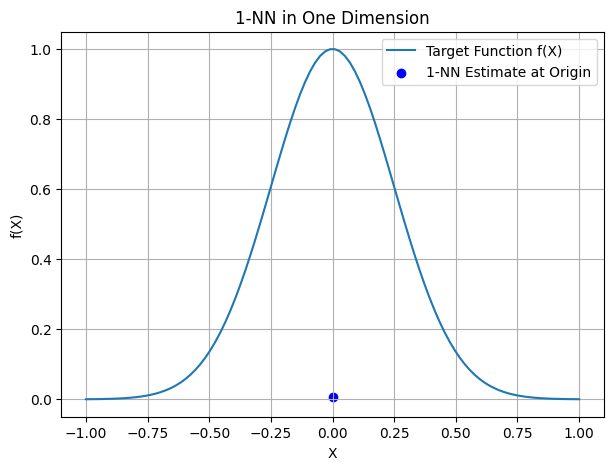

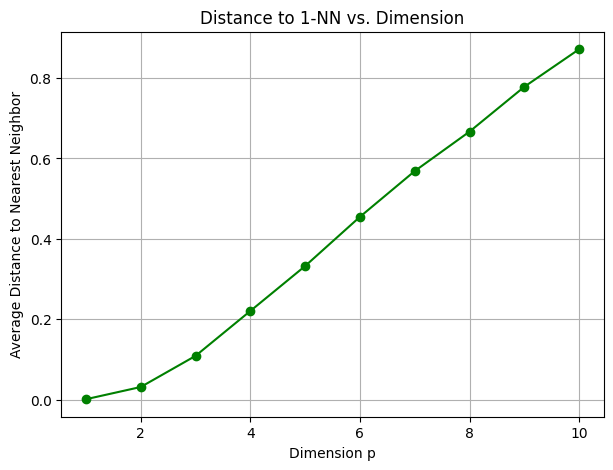

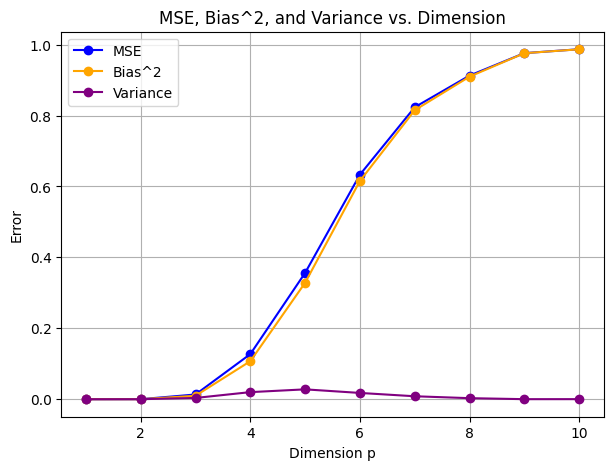

In [6]:
#Figure 2.7

import numpy as np
import matplotlib.pyplot as plt

# set dimensions and sample size
dims = [1,2,3,4,5,6,7,8,9,10]
N = 1000  
num_runs = 100 
x0 = np.zeros(len(dims))  # Test point at the origin

# f(x) function 
def target_function(X):
    return np.exp(-8 * np.sum(X**2, axis=1))

# initialize lists to store results
average_radius = []
mse_list = []
bias_squared_list = []
variance_list = []

# compute the true value at the origin
f0 = target_function(np.array([x0[:1]]))[0]

# perform calculations for each dimension
for p in dims:
    nearest_neighbor_values = []
    nearest_neighbor_distances = []

    for _ in range(num_runs):
        # generate N samples uniformly 
        X_train = np.random.uniform(-1, 1, (N, p))
        y_train = target_function(X_train)

        # calculate distances to the origin and find the nearest neighbor
        distances = np.linalg.norm(X_train, axis=1)
        nearest_idx = np.argmin(distances)
        nearest_neighbor_distances.append(distances[nearest_idx])
        nearest_neighbor_values.append(y_train[nearest_idx])

    # calculate mean of nearest neighbor values
    mean_nn_value = np.mean(nearest_neighbor_values)
    bias_squared = (f0 - mean_nn_value) ** 2

    # calculate variance of nearest neighbor predictions
    variance = np.var(nearest_neighbor_values)

    # calculate MSE as sum of bias^2 and variance
    mse = bias_squared + variance

    # store results
    average_radius.append(np.mean(nearest_neighbor_distances))
    mse_list.append(mse)
    bias_squared_list.append(bias_squared)
    variance_list.append(variance)



# plotting
plt.figure(figsize=(7, 5))
X_vals = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(X_vals, target_function(X_vals), label="Target Function f(X)")
plt.scatter([0], [mean_nn_value], color='blue', label="1-NN Estimate at Origin")
plt.title("1-NN in One Dimension")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(7, 5))
plt.plot(dims, average_radius, marker='o', color="green")
plt.title("Distance to 1-NN vs. Dimension")
plt.xlabel("Dimension p")
plt.ylabel("Average Distance to Nearest Neighbor")
plt.grid()
plt.show()


plt.figure(figsize=(7, 5))
plt.plot(dims, mse_list, label="MSE", marker='o', color="blue")
plt.plot(dims, bias_squared_list, label="Bias^2", marker='o', color="orange")
plt.plot(dims, variance_list, label="Variance", marker='o', color="purple")
plt.title("MSE, Bias^2, and Variance vs. Dimension")
plt.xlabel("Dimension p")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()


Could not replicate the plot 1-NN in One vs. Dimensions 

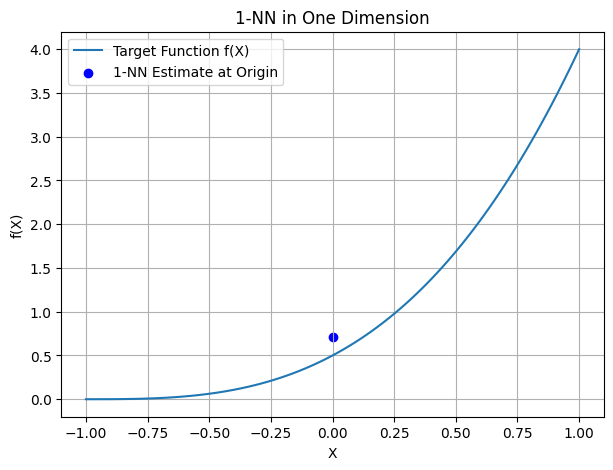

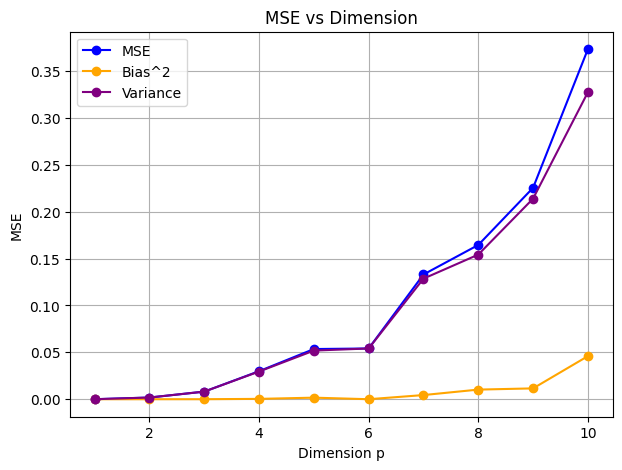

In [5]:
#figure 2.8

import numpy as np
import matplotlib.pyplot as plt

# set dimensions and sample size
dims = [1,2,3,4,5,6,7,8,9,10] 
N = 1000  
num_runs = 100  

# test point at the origin
x0 = np.zeros(len(dims))  

# f(x) function
def target_function(X):
    return 0.5 * (X[:, 0] + 1) ** 3

# compute true value at the origin based on X1 alone
f0 = target_function(np.array([[0]]))[0]

# initialize lists to store results
mse_list = []
bias_squared_list = []
variance_list = []

# perform calculations for each dimension
for p in dims:
    nearest_neighbor_values = []

    for _ in range(num_runs):
        # generate N samples uniformly 
        X_train = np.random.uniform(-1, 1, (N, p))
        y_train = target_function(X_train)  # Only X1 influences y_train

        # calculate distances to the origin and find the nearest neighbor
        distances = np.linalg.norm(X_train, axis=1)
        nearest_idx = np.argmin(distances)
        nearest_neighbor_values.append(y_train[nearest_idx])

    # calculate mean of nearest neighbor values (for bias)
    mean_nn_value = np.mean(nearest_neighbor_values)
    bias_squared = (f0 - mean_nn_value) ** 2

    # calculate variance of nearest neighbor predictions
    variance = np.var(nearest_neighbor_values)

    # calculate MSE as sum of bias^2 and variance
    mse = bias_squared + variance

    # ctore results
    mse_list.append(mse)
    bias_squared_list.append(bias_squared)
    variance_list.append(variance)


#plotting

plt.figure(figsize=(7, 5))
X_vals = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.plot(X_vals, target_function(X_vals), label="Target Function f(X)")
plt.scatter([0], [mean_nn_value], color='blue', label="1-NN Estimate at Origin")
plt.title("1-NN in One Dimension")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(dims, mse_list, label="MSE", marker='o', color="blue")
plt.plot(dims, bias_squared_list, label="Bias^2", marker='o', color="orange")
plt.plot(dims, variance_list, label="Variance", marker='o', color="purple")
plt.title("MSE vs Dimension")
plt.xlabel("Dimension p")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


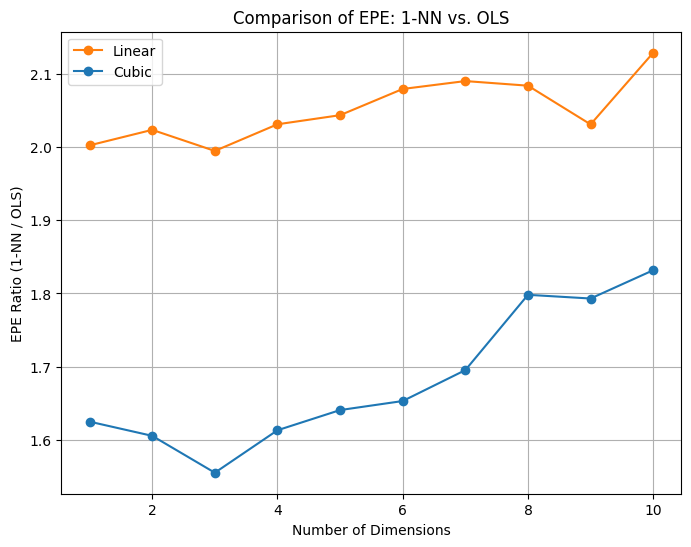

In [10]:
#figure 2.9 , based on this article https://www.danli.org/2021/02/12/esl-chapter-2-overview-of-supervised-learning/#the-curse-of-dimensionality-bellman-1961 (only for 2.9)

# lists to store results
epe_ols_linear_results = []
epe_1nn_linear_results = []
epe_ols_cubic_results = []
epe_1nn_cubic_results = []

n_iterations = 5000
n_points = 500
dimensions = 10

for iteration in range(n_iterations):
    epe_linear_temp = []

    # generate random training data
    X_train = np.random.uniform(-1, 1, size=(n_points, dimensions))
    #linear f(x)
    y_train_linear = X_train[:, 0]  
    #cubic f(x)
    y_train_cubic = ((X_train[:, 0] + 1)**3) / 2  
    noise = np.random.randn(n_points)
    
    y_train_noisy_linear = y_train_linear + noise
    y_train_noisy_cubic = y_train_cubic + noise

    epe_ols_linear = []
    epe_1nn_linear = []
    epe_ols_cubic = []
    epe_1nn_cubic = []
    
    for dim in range(1, dimensions + 1):
        # using first dim 
        X_train_subset = X_train[:, :dim]
        X_augmented = np.hstack((np.ones((n_points, 1)), X_train_subset))

        # Random observation point
        obs_y_linear = np.random.randn(1)
        obs_y_cubic = 0.5 + np.random.randn(1)

        # OLS for linear target
        XtX = X_augmented.T @ X_augmented
        Xty_linear = X_augmented.T @ y_train_noisy_linear
        beta_ols_linear = np.linalg.solve(XtX, Xty_linear)
        ols_prediction_linear = np.array([1] + [0]*dim) @ beta_ols_linear
        epe_ols_linear.append((ols_prediction_linear - obs_y_linear) ** 2)

        # 1-NN for linear target
        distances = np.sum(X_train_subset**2, axis=1)
        nearest_neighbor_index = distances.argmin()
        nn_prediction_linear = y_train_noisy_linear[nearest_neighbor_index]
        epe_1nn_linear.append((nn_prediction_linear - obs_y_linear) ** 2)

        # OLS for cubic target
        Xty_cubic = X_augmented.T @ y_train_noisy_cubic
        beta_ols_cubic = np.linalg.solve(XtX, Xty_cubic)
        ols_prediction_cubic = np.array([1] + [0]*dim) @ beta_ols_cubic
        epe_ols_cubic.append((ols_prediction_cubic - obs_y_cubic) ** 2)

        # 1-NN for cubic target
        nn_prediction_cubic = y_train_noisy_cubic[nearest_neighbor_index]
        epe_1nn_cubic.append((nn_prediction_cubic - obs_y_cubic) ** 2)

    # store results for this iteration
    epe_ols_linear_results.append(epe_ols_linear)
    epe_1nn_linear_results.append(epe_1nn_linear)
    epe_ols_cubic_results.append(epe_ols_cubic)
    epe_1nn_cubic_results.append(epe_1nn_cubic)

# convert as arrays 
epe_ols_linear_arr = np.array(epe_ols_linear_results)
epe_1nn_linear_arr = np.array(epe_1nn_linear_results)
epe_ols_cubic_arr = np.array(epe_ols_cubic_results)
epe_1nn_cubic_arr = np.array(epe_1nn_cubic_results)

# compute ean EPE of all iterations
mean_epe_ols_linear = epe_ols_linear_arr.mean(axis=0)
mean_epe_1nn_linear = epe_1nn_linear_arr.mean(axis=0)
mean_epe_ols_cubic = epe_ols_cubic_arr.mean(axis=0)
mean_epe_1nn_cubic = epe_1nn_cubic_arr.mean(axis=0)

# plotting the ratio
dimension_range = list(range(1, dimensions + 1))
plt.figure(figsize=(8, 6))
plt.plot(dimension_range, mean_epe_1nn_linear / mean_epe_ols_linear, '-o', color='C1', label='Linear')
plt.plot(dimension_range, mean_epe_1nn_cubic / mean_epe_ols_cubic, '-o', color='C0', label='Cubic')
plt.legend()
plt.xlabel('Number of Dimensions')
plt.ylabel('EPE Ratio')
plt.title('Comparison of EPE: 1-NN vs. OLS')
plt.grid(True)
plt.show()


## Exercise 3 - [15%]

**a)** The rule of thumb for **train/test split** ratio is to choose it to be quite larger than 1 (e.g a 75%-25% train/test split). Validate empirically this choice:

* Choose a dataset for a classification task.
* Use a classification method that is suitable for the problem (i.e. performs reasonably well on the dataset).
* Try several train/test split ratio values (e.g. 0% to 100% with step 5%).
* Use plot(s) to display the performance of the method on the test set in each case.
* Justify in detail the observed behavior using arguments founded in the theory (see bias-variance trade off).
* What is (approx.) the best choice of ratio in your case?
* Now, using a train/validation/test split, optimize the hyperparameters of your model, and give the final trained model that you would deliver for practical use. 

**b)** *Cross-validation* splits the set of data in non-overlapping parts, then learns and tests the performance of a method independently in the different parts of the data, e.g. i) train-test set split, or ii) k-folded approach. 

Imagine that you have to apply (i) and (ii) for validating a regression method for time-series, a task which is also referred as *time-series forecasting*. Note that in this case the element of time should be respected.

Describe a procedure, by giving a pseudocode, that would apply (i) and (ii).



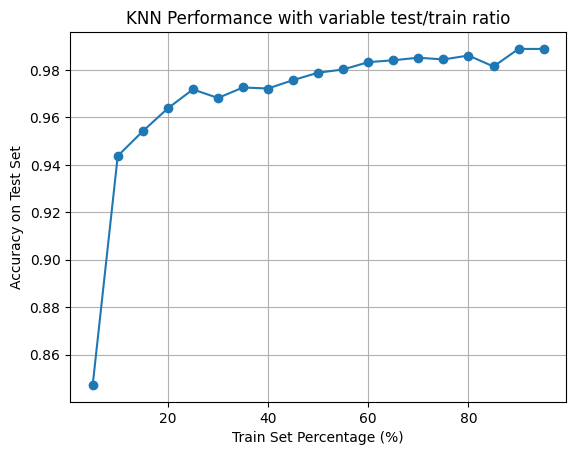

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# load the Iris dataset
digit = datasets.load_digits()
X = digit.data
y = digit.target

# test/train ratios
split_ratios = np.arange(0.05, 1.0, 0.05)
accuracies = []

# looping on the different ratios
for ratio in split_ratios:
    # spliting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=12)
    
    # using KNN for our classification task with k = 3
    clf = KNeighborsClassifier(n_neighbors=3)
    # fitting the model
    clf.fit(X_train, y_train)
    # predicting on the test sample
    y_pred = clf.predict(X_test)
    #storing the results
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# plotting the results
plt.plot(split_ratios * 100, accuracies, marker='o', linestyle='-')
plt.xlabel('Train Set Percentage (%)')
plt.ylabel('Accuracy on Test Set')
plt.title('KNN Performance with variable test/train ratio')
plt.grid()
plt.show()


The bias is the inability of the model to capture the true relationships between the data , on the other hand variance is the inability of the model to perform well on data it has never seen before, due to it fitting to well on the training data.

A model with high bias results in low variance meaning that it will give consistent predictions.
A model with relatively low bias result in high variance meaning that the model will give inconsistent predictions sometimes adapting pretty well to the test set sometimes terribly.

In our example we observe that when the train set is small (between 5% and 20%) the model doesnt perform as well, due to the fact it has not enough data to train on and therefore cannot generalize as-well on new data, in this case the model suffers from high variance (relatively, it still achives ~80% precision).

above 20% and up to 60% the precision increases slowly, with larger train sets the model is able to capture more depth in the relationships and reducing it's bias.

between 60% and 80% we observe a plateau where the accuracy of the prediction is stable, leaning toward the fact that a good tradeoff between variance and bias has been achieved validating the previous assumption of the 25%~75% split for test/train.

In our case the best value is actually more 30%~70% split for test/train


The bias is the inability of the model to capture the true relationships between the data , on the other hand the variance is the inability of the model to perform well on data it have never seen before because it adapted too well on the training data.

In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# loading the dataset
digits = load_digits()

# split train/validation/test in 60/20/20
X_train_full, X_test, y_train_full, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

# tuning hyperparameters using gridsearch
# we're lookin to optimize n_neighbors , the metric used , the weights, the algorithm used
param_grid = {
    'n_neighbors': range(2, 21),  
    'metric': ['euclidean','manhattan','minkowski'],  
    'weights': ['uniform','distance'],
    'algorithm': ['brute','ball_tree','kd_tree']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# getting and printing the, best found results  
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_wieght = grid_search.best_params_['weights']
best_algo = grid_search.best_params_['algorithm']

print("Optimal k:", best_k)
print("Optimal metric:", best_metric)
print("Optimal weight: ", best_wieght)
print("Optimal algo : ",best_algo)

# evaluate on the validation set
best_knn = grid_search.best_estimator_
y_val_pred = best_knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

# train final model on train + validation data with optimal hyperparameters found
final_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_knn.fit(X_train_full, y_train_full)

# evaluate on the test set
y_test_pred = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

Optimal k: 2
Optimal metric: euclidean
Optimal weight:  distance
Optimal algo :  brute
Validation accuracy: 0.9888888888888889
Test accuracy: 0.9805555555555555


The optimal hyperparametrs are :

Optimal k: 2

Optimal metric: euclidean

Optimal weight:  distance

Optimal algo :  brute


with the following results :

Validation accuracy: 0.9888888888888889

Test accuracy: 0.9805555555555555

b) In the case of time-series forecasting, the chronological order of data points is important and must be respected when training and testing the model, by that we mean that doing regular cross validation where we shuffle the dataset into train/test in a random fashion would break temporal dependency of data, so we have to ensure that the model does not train on future data to predict past data.

In [ ]:
# i) train/test split pseudocode

def time_based_forecasting(data,test_size)
    n := length(data)
    train_size := n - test_size

    train_data := date[1:train_data]
    test_data := data[train_size + 1 : n]

    model := fit(train_data)
    prediction := model.predict(test_data)

    evaluate(prediction, test_data)


In [ ]:
# ii) k-folded approach pseudocode

def k_fold_time_based_forecasting(data,k):
    n := length(data)
    fold_size := floor(n / k)

    for i:= 1 to k do:
        train_end := i * fold_size
        train_data := data[1:train_end]
        test_data := data[train_end +1:min((i+1) * fold_size , n)]
        model := fit(train_data)
        prediction := model.predict(test_data)

        evaluate(prediction,test_data)

## Exercise 4 - [20%]

The purpose of this exercise is to apply classification for two data classes using a **simple linear model**. However, the particularity is that we are in the context of *stream processing* where data arrive sequentially in pairs of observations, containing one observation from each class, i.e. each time $t$ we observe $(x_t \in \text{class A}, x'_t \in \text{class B})$. As *we cannot store all the data* to apply batch processing, we need to develop a frugal online learning approach that would require as little as possible stored information at each time $t$ for a simple linear model $model_t$, which then would be updated based on the incoming $(x_t, x'_t)$'s. At any time $t$ the model $model_t$ should be able to classify uknown data.

**a)** Analyze in detail the requirements of this problem setting, and implement an approach to produce a linear model for all the data of the stream. Explain why it is correct and how much memory resources it would need to run.

**b)** To train your model consider $N = n+n$ data produced two 2D Gaussian distributions ($n$ instances from each of them) that have (e.g.) same standard deviation and different mean values $\mu_1$ and $\mu_2$. Use a large $N$ (e.g. $500$) and show the performance of $model_t$ at the course of time (i.e. for $t=1,...,N$) using a test-set of $500 + 500$ datapoints generated from the same distributions. Compare in the same plot (e.g. it would appear as fixed horizontal line) against a linear classifier that is trained directly on the $N$ datapoints. Use a couple of $\mu_1$ and $\mu_2$ pairs to show an easy case and a more difficult one.



a) Analyzing the requirements of the problem setting :
Since at each step $t$ we receive a new pair of data point from both classes , the model must update at each step without storing all the previous data, storing as little data as possible aka the current state of the model and the hyperparameters, since we're ought to use a linear model it would be of the form : $ y = w^{T}x + b $ where $w$ is a weight vector and $b$ the bias term, adter each step the model should be able to classify new data with relative increasing precision (it xouls be bad at the beginning and increasing with the number of steps $t$). This beahviour can is actually the definition of Stochastic Gradient Descent (SGD) which processes data one data pair at the time and updates accordingly. In order to do implement that we initialize a weight vector $w$ and a bias $b$ to small random values or to 0, we stup our parameters (nuber of iteration and earning rate), we formulate a loss function (hinge loss or logistic loss), we then compute the gradient of the loss with respect to w and b using the current pair of data points, we update the weight vector and the bias, we repeat the previous steps until our model converges or reaches the maximum number of iterations.
In terms of Memory requirements, we only need to store the current weight vector $w$ the bias term $b$ and learning rate $\alpha$, the complexity would be of $O(d)$ where $d$ is the dimension of the output data.
This approach is the most adapted and correct because it fits the requirement of the problem given , SGD converges to a near-optimal solution in online learning tasks, we approximate the solution that would have been found by a batch training model that would have trained on all the data, but without the same memory complexity.

b) 

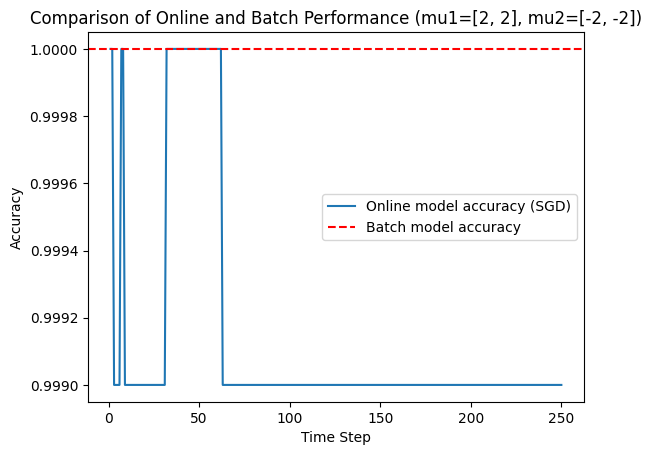

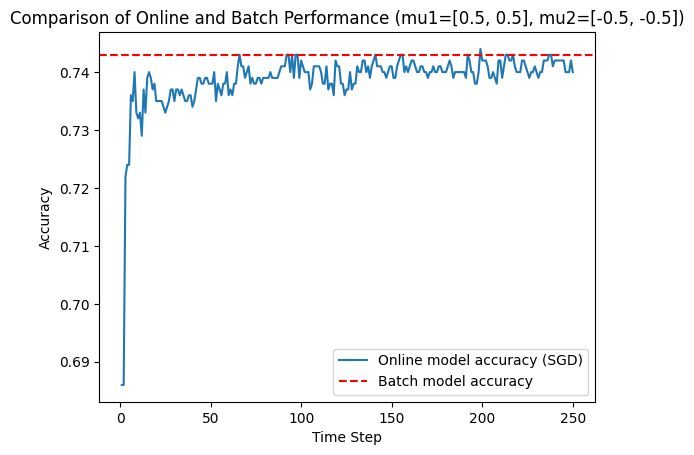

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score

# 2D gaussian distribution data 
def gaussian_2d_distrib(mean, std_dev, n):
    return np.random.multivariate_normal(mean, std_dev, n)

# online linear model with SGD
class OnlineLinearModel:
    def __init__(self, dim, learning_rate=0.01, regularization=0.001):
        # init weight vector, and bias to 0
        self.w = np.zeros(dim)  
        self.b = 0  
        # init learning rate alpha
        self.lr = learning_rate  
        # init regularization term
        self.reg = regularization  

    # definig our loss function here hinge_loss
    def hinge_loss_func(self, x_t, x_prime_t):
        grad_w = np.zeros_like(self.w)
        grad_b = 0
        if 1 - (np.dot(self.w, x_t) + self.b) > 0:
            grad_w -= x_t
            grad_b -= 1
        if 1 + (np.dot(self.w, x_prime_t) + self.b) > 0:
            grad_w += x_prime_t
            grad_b += 1
        return grad_w, grad_b

    # updating weight vector and bias term
    def update_model(self, x_t, x_prime_t):
        grad_w, grad_b = self.hinge_loss_func(x_t, x_prime_t)
        self.w = self.w - self.lr * (grad_w + self.reg * self.w)
        self.b = self.b - self.lr * grad_b

    # classification
    def classify(self, x):
        return 1 if np.dot(self.w, x) + self.b > 0 else -1


def model_comparaison(mu1, mu2, n=250, std=1, test_size=500):
    # setting std_dev
    std_dev = [[std**2, 0], [0, std**2]]

    # generate train with 2d gaussian distribution
    A_train = gaussian_2d_distrib(mu1, std_dev, n)
    B_train = gaussian_2d_distrib(mu2, std_dev, n)
    train_data = np.vstack((A_train, B_train))
    train_labels = np.hstack((np.ones(n), -1 * np.ones(n)))

    # generate test data with 2d gaussian distribution
    A_test = gaussian_2d_distrib(mu1, std_dev, test_size)
    B_test = gaussian_2d_distrib(mu2, std_dev, test_size)
    test_data = np.vstack((A_test, B_test))
    test_labels = np.hstack((np.ones(test_size), -1 * np.ones(test_size)))

    # using OnlineLinearModel, to incrementaly train on data stream 
    online_model = OnlineLinearModel(dim=2)
    online_accuracies = []

    # training the model
    for t in range(n):
        x_t = A_train[t]
        x_prime_t = B_train[t]
        online_model.update_model(x_t, x_prime_t)

        # testing after each step t
        predictions = np.array([online_model.classify(x) for x in test_data])
        accuracy = accuracy_score(test_labels, predictions)
        online_accuracies.append(accuracy)

    # we use a batch model with logistic regression to compare 
    batch_model = LogisticRegression()
    batch_model.fit(train_data, train_labels)
    batch_predictions = batch_model.predict(test_data)
    batch_accuracy = accuracy_score(test_labels, batch_predictions)

    # plotting
    plt.plot(range(1, n+1), online_accuracies, label='Online model accuracy (SGD)')
    plt.axhline(y=batch_accuracy, color='r', linestyle='--', label='Batch model accuracy')
    plt.xlabel('Time Step')
    plt.ylabel('Accuracy')
    plt.title(f'Comparison of Online and Batch Performance (mu1={mu1}, mu2={mu2})')
    plt.legend()
    plt.show()


# easy test case , well separated data
easy_x = [2, 2]
easy_y = [-2, -2]

# hard test case , hard to distinguish
hard_x = [0.5, 0.5]
hard_y = [-0.5, -0.5]

# running comparaison
model_comparaison(easy_x, easy_y)
model_comparaison(hard_x, hard_y)


## Exercise 5 - [10%]

Relying on the central hypothesis that a learning problem should enjoy regularity along the domain of the data (see [Lab 1](http://kalogeratos.com/MyCourses/DML-M2HPC/Lab1.ipynb)), we would like to define a heuristic data-driven measure to evaluate a given model.

More specifically, consider a classification problem and define a regularity measure based on the nearest neighbors principle that can assess how regular the decisions of a given classifier is. Explain the logic of your proposition. Let's call this function **Regularity(X, Y, +any needed parameters)**.

**Recipe for testing**

In this exercise you have to generated data from a mixture of 2 Gaussian distributions, and then measure the effect of your Regularity measure and the standard Accuracy with regards to the following factors:

* the size of the dataset; try generating classes of same standard deviation $\sigma = 2$ and equal size, where each of them will have $n_i\in\{50, 100, 200, 500\}$ objects;
* the dimensionality $d$ of the data; try $d\in\{1,2,3,...\,,10, 20, 30,...\,100\}$;
* the overlap of the classes $\delta$ in the feature space, i.e. the distance between the classes; try $\delta\in\{\sigma, 2\sigma, 3\sigma, 4\sigma\}$;
* the input parameter $k$ which indirectly adjusts how far from an object the classifier will seek for `advices' from other objects in order to classify it; try $k\in\{1,...\,,10\}$.

**Sample pseudocode:**  

for each tuple <$n$, $d$, $\delta$, $k$>
   * generate data  
   * compute average quality over $10$ runs of the following  
       * train a $k$NN classifier and a decision tree (choose nicely the depth)   
       * test the classifiers using Accuracy and Regularity  

end for

The evaluation should be performed with and without 10-fold CV (inside the train/test nested part). Use at least the suggested value range for each parameter, but you can extend it if this way you capture some interesting behavior. 

**Questions:** 
- What is the main difference between a $k$NN and a radius-NN classifier? In which case(s) one is better to the other? How would we have to adapt the above discussion if radius-NN classifier is used instead of the standard $k$NN?


- What would change if we were interested in measuring the Regularity in the context of a regression problem?



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold

def regularity(X, Y, classifier, k=5):
    n = len(X)
    knn_distances = cdist(X, X, metric='euclidean')
    regularity_scores = []
    # predict with given classifier
    predictions = classifier.predict(X)
    
    for i in range(n):
        # get knn indices
        knn_indices = np.argsort(knn_distances[i])[1:k+1]
        knn_labels = predictions[knn_indices]
        # compute regularity as % of neighbor that have same prediction
        regularity = np.mean(knn_labels == predictions[i])
        regularity_scores.append(regularity)
    
    return np.mean(regularity_scores)

def double_gaussian_distrib(n, dim, delta, sigma=2):

    distrib1 = np.zeros(dim)
    distrib2 = np.ones(dim) * delta 
    
    # generate datapoints
    X1 = np.random.normal(loc=distrib1, scale=sigma, size=(n, dim))
    X2 = np.random.normal(loc=distrib2, scale=sigma, size=(n, dim))
    
    X = np.vstack((X1, X2))
    Y = np.hstack((np.zeros(n), np.ones(n)))
    
    return X, Y

def evaluate_classifiers(X, Y, k, cv_folds=10):
    """train knn, decision tree classifiers with 10-fold CV and compute acccuracy and regularity"""
    kf = KFold(n_splits=cv_folds)
    
    knn_accuracies = []
    knn_regularity_scores = []
    tree_accuracies = []
    tree_regularity_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        # train knn
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        knn_acc = accuracy_score(Y_test, knn.predict(X_test))
        knn_reg = regularity(X_test, Y_test, knn, k=k)
        
        # train decision tree
        tree = DecisionTreeClassifier(max_depth=5)
        tree.fit(X_train, Y_train)
        tree_acc = accuracy_score(Y_test, tree.predict(X_test))
        tree_reg = regularity(X_test, Y_test, tree, k=k)
        
        # append results
        knn_accuracies.append(knn_acc)
        knn_regularity_scores.append(knn_reg)
        tree_accuracies.append(tree_acc)
        tree_regularity_scores.append(tree_reg)
    
    # avg accuracy and regularity over the 10 folds
    avg_knn_acc = np.mean(knn_accuracies)
    avg_knn_reg = np.mean(knn_regularity_scores)
    avg_tree_acc = np.mean(tree_accuracies)
    avg_tree_reg = np.mean(tree_regularity_scores)
    
    return avg_knn_acc, avg_knn_reg, avg_tree_acc, avg_tree_reg



def bench():
    results = []
    dataset_sizes = [50, 100, 200, 500]
    dimensions = [1, 2, 3, 10, 20, 30, 50, 100]
    deltas = [2, 4, 6, 8]
    k_values = range(1, 11)
    #looping through all the parameters
    for n in dataset_sizes:
        for dim in dimensions:
            for delta in deltas:
                for k in k_values:
                    # generate data with double gaussian ditribution
                    X, Y = double_gaussian_distrib(n, dim, delta)
                    # evaluation
                    knn_acc, knn_reg, tree_acc, tree_reg = evaluate_classifiers(X, Y, k)
                    
                    # Evaluate classifiers with 10-fold CV
                    knn_acc_cv, knn_reg_cv, tree_acc_cv, tree_reg_cv = evaluate_classifiers(X, Y, k)
    
                    # store results
                    results.append({'n': n,'d': dim,'delta': delta,'k': k,'knn_acc': knn_acc,'knn_reg': knn_reg,'tree_acc': tree_acc,'tree_reg': tree_reg,'knn_acc_cv': knn_acc_cv,'knn_reg_cv': knn_reg_cv,
                        'tree_acc_cv': tree_acc_cv,'tree_reg_cv': tree_reg_cv})
                    
                    # print results
                    print(f'n={n}, d={dim}, delta={delta}, k={k}: '
                          f'kNN Acc={knn_acc:.2f} (CV={knn_acc_cv:.2f}), kNN Reg={knn_reg:.2f} (CV={knn_reg_cv:.2f}), '
                          f'Tree Acc={tree_acc:.2f} (CV={tree_acc_cv:.2f}), Tree Reg={tree_reg:.2f} (CV={tree_reg_cv:.2f})')
    
    return results

#runnig the bench on all the parameters given
results = bench()



Question 1 :
Th main difference between knn and radius-nn is the number of neighbor, in knn we use exactly k nearest neighbor for each test point regardless of their distances, in radius-nn however the number of neighbor may vary depending on the density of data in that region, knn is better when we have consistency in density for the data, and radius-nn is better for sparse data. If we used radius-nn instead of knn we would have to adjust the radius instead of k.

Question 2 :
In regression we could modify the regularity measure to check the difference in predicted values rather than class labels, for each datapoint we compare the predicted value to the average predicted values of knn , a samller difference would mean higher regularity.


## Exercise 7 - [10%]

Apply ridge regression and lasso regression on the diabetes dataset. Use all the features but the 11th as input parameters, and the 11th as target (it's an index showing the progression of the disease). 
* Search for a good $a$ regularization penalty using Cross Validation (use built-in functions of scikit-learn) for each mehtod, as in the examples 4 and 5 of Lab 2. 
* Generate plots that show the evolution of all the coefficients (the elements of the $w$ vector) and -in a second plot- regression scores such as the resiguals and the [$R^2$ measure](https://en.wikipedia.org/wiki/Coefficient_of_determination) showing how well the model fits to the data.
* Discuss your comparative findings.

In [ ]:
from sklearn import linear_model,datasets
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# loading the dataset
diabetes = datasets.load_diabetes()

# using all but the 11th feature 
X = diabetes.data[:, :-1]

# split data into training/testing sets 
x_train = X[:-20]
x_test = X[-20:]

# split targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

# set alpha values range
n_alphas = np.logspace(-3, 3, 100)

# arrays to store Ridge and Lasso coefficient
ridge_coefficients = []
lasso_coefficeints = []

# arrays to store Ridge and Lasso predictions
ridge_predictions = []
lasso_predictions = []

for alpha in n_alphas:
    reg_ridge = linear_model.RidgeCV(alphas=[alpha])
    reg_lasso = linear_model.LassoCV(alphas=[alpha], max_iter=10000, random_state=42)

    # fit models
    reg_ridge.fit(x_train, y_train)
    reg_lasso.fit(x_train, y_train)

    # predictions
    ridge_y_predict = reg_ridge.predict(x_test)
    lasso_y_predict = reg_lasso.predict(x_test)

    # store coefficients
    ridge_coefficients.append(reg_ridge.coef_)
    lasso_coefficeints.append(reg_lasso.coef_)

    # store predictions
    ridge_predictions.append(ridge_y_predict)
    lasso_predictions.append(lasso_y_predict)


# convert to arrays for plotting
ridge_coefs = np.array(ridge_coefficients)
lasso_coefs = np.array(lasso_coefficeints)

# calculating the residuals
ridge_residuals = y_test - reg_ridge.predict(x_test)
lasso_residuals = y_test - reg_lasso.predict(x_test)


# calculating the R^2 score
ridge_r2_scores = []
lasso_r2_scores = []
for ridge_pred, lasso_pred in zip(ridge_predictions, lasso_predictions):
    ridge_r2_scores.append(r2_score(y_test, ridge_pred))
    lasso_r2_scores.append(r2_score(y_test, lasso_pred))


# plot the evolution of coefficients
# for Ridge regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(n_alphas, ridge_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficient Paths")

# for Lasso regression
plt.subplot(1, 2, 2)
plt.plot(n_alphas, lasso_coefs)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficient Paths")
plt.tight_layout()
plt.show()

# plotting Residuals 
plt.subplot(1, 3, 1)
plt.scatter(range(len(ridge_residuals)), ridge_residuals, color="blue", label="Ridge Residuals", alpha=0.6)
plt.scatter(range(len(lasso_residuals)), lasso_residuals, color="red", label="Lasso Residuals", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals for Ridge and Lasso Regression")
plt.show()


# plotting R2 scores for both Lasso and Ridge
plt.subplot(1, 1, 1)
plt.plot(n_alphas, ridge_r2_scores, label="Ridge R2 Score", color="blue", marker="o")
plt.plot(n_alphas, lasso_r2_scores, label="Lasso R2 Score", color="red", marker="x")
plt.xscale("log")  
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.title("Ridge and Lasso R^2 scores as a function of the regularization")
plt.grid(True)
plt.show()

Discussing the results :

<img src="./plots/ridge_lasso_coefficients_cv.png" alt="Drawing"/>

For Ridge regression, as the regularization parameter $alpha$ increases, the coeffcients gradually reduce asymptotically close to 0 but never reaches it because ridge regression doesn't cancel coefficents unlike Lasso, it allows it to retains all features ( it assumes that all coefficients are not absurd and that they all contribute to the model even at lower scale).
For Lasso regression on the other hand, many coefficients get reduced to 0, it is beacause Lasso regression encourages sparsity, performing feature selection and getting rid of the ones that are irrelevant to the model.

<img src="./plots/residual_scores_exo7.png" alt="Drawing"/>

From plotting the residuals, we observe that Lasso's and Ridges's are overlapping, indicating that they have similar performances, meaning that the features are highly correlated we can also conclude that for this specific dataset the choice between Lasso and Ridge may not have a real impact on the performance of the model.

<img src="./plots/r2_scores_lasso_ridge.png" alt="Drawing"/>

We can see that at lower alpha values a slight increase is noted, meaning that the regularization kicks in and helps improve the performance of the model by reducing overfitting. As alpha values increases the score decrases proportionally showing that excessive regularization penalties leads to underfitting and the incapability of the model to capture patters in the dataset, this observation applies for both Lasso and Ridge regression.